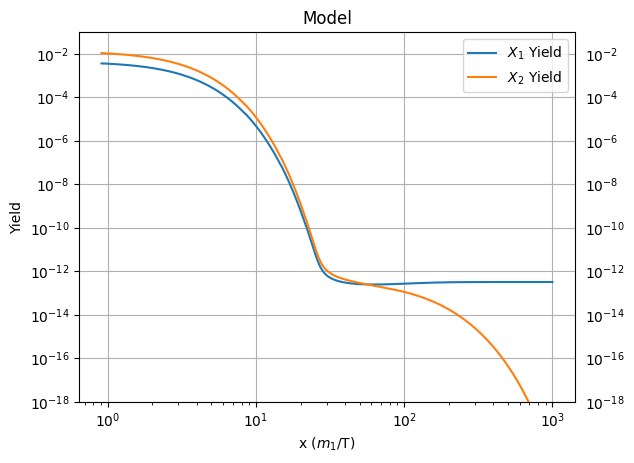

In [ ]:
#Plot yields without the equilibrium values
import pandas as pd
import matplotlib.pyplot as plt

solution_path = r'path_to_solution' #path to the solution.csv
data = pd.read_csv(solution_path) #reading the data from the solution
x = data['# x']
sol_dm = data['Y(xm)']
sol_mediator = data['Y(b2)']

#plot
plt.plot(x, sol_dm, label=r'$X_1$ Yield')
plt.plot(x, sol_mediator, label=r'$X_2$ Yield')
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labeltop=False, labelright=True)
plt.title(r'Model')
plt.xlabel(r'x ($m_1$/T)')
plt.ylabel(r'Yield')
plt.ylim(10**(-18), 10**(-1))
name = 'solution'
plt.grid()
plt.legend()
plt.savefig(name, dpi = 1000)

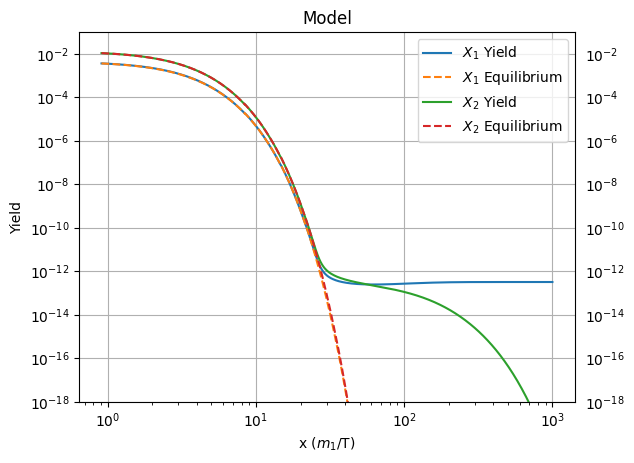

In [ ]:
#Compute the equilibrium yield for both particles, and plot yields WITH equilibrium values

import numpy as np
from scipy.special import zeta, kn

def gstar(T: float) -> float:
    """
    Calculates the number of relativistic degrees of freedom for a given temperature T (in GeV)
    assuming only the SM degrees of freedom.

    :param T: thermal bath temperature (in GeV)

    """
    
    if T >= 59:
        g_star = 106.75
    elif T>= 49:
        g_star = 103
    elif T >= 40:
        g_star = 102
    elif T>= 34:
        g_star = 100
    elif T>= 23:
        g_star = 95
    elif T>= 14:
        g_star = 90
    elif T>= 4.43:
        g_star = 85
    elif T>= 1.75:
        g_star = 80
    elif T >= 0.7:
        g_star = 70
    elif T>= 0.28:
        g_star = 60
    elif T>= 0.2:
        g_star = 50
    elif T >= 0.1:
        g_star = 18
    elif T >= 0.0132:
        g_star = 10
    else:
        g_star = 3
    return g_star


def S(T: float) -> float:
    """
    Calculates the entropy density s for a given temperature T (in GeV)

    :param T: thermal bath temperature (in GeV)
    """
    
    g_star = gstar(T) #g_star is the number of relativistic degrees of freedom
    s = (2*np.pi**2/45)*g_star*T**3

    return s

def Neq(T: float, m: float, g: int) -> float:
    """
    Calculates the equilibrium number density at a temperature T (in GeV) for a certain particle, 
    using Fermi-Dirac or Bose-Einstein Statistics.

    :param T: thermal bath temperature (in GeV)
    :param m: Particle mass
    :param g: Particle's degrees of freedom. Use g < 0 for bosons and g > 0 for fermions

    """

    xm = m/T     
    if xm > 10: #non-relativistic regime
        coeffs = [1,15./8.,105./128.,-315./1024.,10395./32768.]
        neq = (m**3*np.exp(-xm)/(xm**(3/2)))*(1/(2*np.sqrt(2)*np.pi**(3/2)))
        neq = neq*sum([c/xm**i for i,c in enumerate(coeffs)])
    elif xm > (0.25): #semi-relativistic regime
        neq = m**3*(1/(2*np.pi**2))*kn(2, xm)/xm
    else: #relativistic regime
        neq = (zeta(3)/np.pi**2)*T**3 # bosons
        if g < 0:
           neq = (3/4)*neq # fermions
            
    neq = abs(g)*neq
    
    return neq

def Yeq(T: float, m: float, g: int) -> float:
    """
    Calculates the equilibrium yield at a temperature T (in GeV) for a certain particle, 
    using Fermi-Dirac or Bose-Einstein Statistics.

    :param T: thermal bath temperature (in GeV)
    :param m: Particle mass
    :param g: Particle's degrees of freedom. Use g < 0 for bosons and g > 0 for fermions

    """
    
    
    s = S(T) #entropy density
    neq = Neq(T,m,g)
    yeq = neq/s
    return yeq

solution_path = r'path_to_solution' #path to the solution.csv
data = pd.read_csv(solution_path) #reading the data from the solution file
x = data['# x']
sol_dm = data['Y(xm)']
sol_mediator = data['Y(b2)']
mDM = 500 #DM mass
m_med = 510 #mediator mass
gDM = 2 #DM degrees of freedom
g_med = -6 #mediator degrees of freedom, negative since it is a boson
equilibrium_dm = list() #list to keep the equilibrium values for DM
equilibrium_med = list() #list to keep the equilibrium values for the mediator
for i in range(0, len(x)):
    T = mDM/x[i] #temperature in GeV
    dm_value = Yeq(T, mDM, gDM)
    equilibrium_dm.append(dm_value)
    med_value = Yeq(T, m_med, g_med)
    equilibrium_med.append(med_value)

#plot
plt.plot(x, sol_dm, label=r'$X_1$ Yield')
plt.plot(x, equilibrium_dm, label=r'$X_1$ Equilibrium', linestyle='dashed')
plt.plot(x, sol_mediator, label=r'$X_2$ Yield')
plt.plot(x, equilibrium_med, label=r'$X_2$ Equilibrium', linestyle='dashed')
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labeltop=False, labelright=True)
plt.title(r'Model')
plt.xlabel(r'x ($m_1$/T)')
plt.ylabel(r'Yield')
plt.ylim(10**(-18), 10**(-1))
name = 'solution'
plt.grid()
plt.legend()
plt.savefig(name, dpi = 1000)